# Plotting global map contours

obrero is equipped with some functions to plot contour maps. It uses both `matplotlib.pyplot.contourf()` and `matplotlib.pyplot.pcolormesh()` to do so. We simply have added some functionality that allows us to automate things a little bit. Now the user only has to worry about setting up some specifications for a plot and then obrero will work with that in order to create a contour plot. First let's import obrero:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero

Say we want to plot sea surface temperature (SST) data. We first read the data. We will also read the land binary mask because we want to mask out all land values since we are working with SST.

In [2]:
# file names
f1 = 'data/sst_ctl.nc'
f2 = 'data/lsm.nc'

# read data
da = obrero.read_nc(f1, 'tosbcs')
lm = obrero.read_nc(f2, 'lsm')

# convert units
da.convert_units('Celsius')

We will use the `mean()` method all xarray's `DataArray` come with to obtain the mean SST values. Following that we will mask out land values.

In [3]:
# get mean
mn = da.mean(dim='time', keep_attrs=True)

# mask out land
mno = obrero.mask_land_ocean(mn, lm, ocean=True)

Now this is the variable we want to plot with contours. To do this we can use the function in obrero `plot_global_contour()`. This bare function simply creates an axes if none is given and plots data on that axes and returns it. So it does not create a `matplotlib.figure.Figure` instance with size and also does not execute the `matplotlib.pyplot.show()` function, which means nothing will be displayed or saved. There are plenty of specifications we can use in `plot_global_contour()`, so here we will only show some of them. So this function still needs some help from matplotlib if we are going to use it. Let's see:

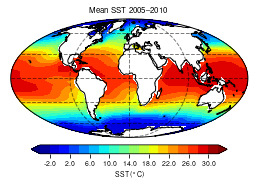

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# create figure instance with size in mm
fig = plt.figure(figsize=(100/25.4, 65/25.4))

# create dictionary with specs
specs = dict(method='filled', minv=-4, maxv=32, nlevels=19, extend='both',
            title=r'Mean SST 2005--2010', cbstring=r'SST (\degree\,C)')
obrero.plot_global_contour(mno, **specs)

# maximize plot and show
plt.tight_layout()
plt.show()

As you can see, if no axes are given, this function likes the Mollweide projection from cartopy. Also know that gridlines are spaced every 90° in meridians and every 30° in parallels, and this cannot be changed by the user currently without changing obrero code. 

If you prefer some other projection, then you will have to import cartopy yourself and create an axes to add to the specifications dictionary:

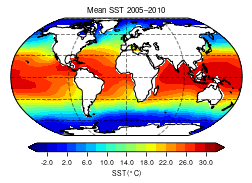

In [8]:
from cartopy.crs import Robinson as rob

# create figure instance with size in mm
fig = plt.figure(figsize=(100/25.4, 65/25.4))

# create axes I like
ax = fig.add_subplot(111, projection=rob())

# create dictionary with specs
specs['axes'] = ax
obrero.plot_global_contour(mno, **specs)

# maximize plot and show
plt.tight_layout()
plt.show()

If you still like Mollweide projection but you would prefer to have a different central longitude for the projection, you can set the `lon0` keyword in the specifications:

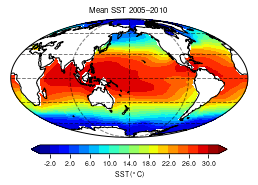

In [9]:
# create figure instance with size in mm
fig = plt.figure(figsize=(100/25.4, 65/25.4))

# create dictionary with specs
del specs['axes']
specs['lon0'] = 180.0
obrero.plot_global_contour(mno, **specs)

# maximize plot and show
plt.tight_layout()
plt.show()

## List of specifications options for `plot_global_contour()`

These are all optional and have default settings. If you are curious read the docstrings for more details:

- `method`: either 'filled' or 'mesh' if you want `contourf()` or `pcolormesh()`
- `cm`: color map to use
- `minv`: minimum value in contour levels
- `maxv`: maximum value in contour levels
- `nlevels`: number of contour levels
- `levels`: in case you want to provide specific contour levels as a list or numpy.ndarray
- `title`: centered title on top of map
- `cbstring`: label for the colorbar
- `extend`: whether to show arrows in colorbar. Possible values are 'min', 'max', 'both' or 'none'
- `name`: to place a small text box in the bottom right corner of the map with a name. Use this if this is a plot for a particular month or season
- `axes`: axes on which to plot. You can create such using cartopy
- `lon0`: for the default Mollweide projection you can change the central longitude with this keyword
- `cticks`: ticks for the colorbar in case you want some specific ticks